## Data Loading

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [107]:
df = pd.read_csv('Pune house data.csv')

## Exploratory Data Analysis

In [108]:
df.head(5)

,area_type,availability,size,society,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,Coomee,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,Theanmp,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,NaN,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,Soiewre,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,NaN,1200,2.0,1.0,51.00,Aundh Road


In [109]:
df.size

119880

In [110]:
df.shape

(13320, 9)

In [111]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   area_type      13320 non-null  object 
 1   availability   13320 non-null  object 
 2   size           13304 non-null  object 
 3   society        7818 non-null   object 
 4   total_sqft     13320 non-null  object 
 5   bath           13247 non-null  float64
 6   balcony        12711 non-null  float64
 7   price          13320 non-null  float64
 8   site_location  13319 non-null  object 
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [112]:
df.describe()

,bath,balcony,price
count,13247.000000,12711.000000,13320.000000
mean,2.692610,1.584376,112.565627
std,1.341458,0.817263,148.971674
min,1.000000,0.000000,8.000000
25%,2.000000,1.000000,50.000000
50%,2.000000,2.000000,72.000000
75%,3.000000,2.000000,120.000000
max,40.000000,3.000000,3600.000000


In [113]:
df.isnull().sum()

area_type           0
availability        0
size               16
society          5502
total_sqft          0
bath               73
balcony           609
price               0
site_location       1
dtype: int64

In [114]:
df.nunique()

area_type           4
availability       81
size               31
society          2688
total_sqft       2117
bath               19
balcony             4
price            1994
site_location      97
dtype: int64

### Data Viualization

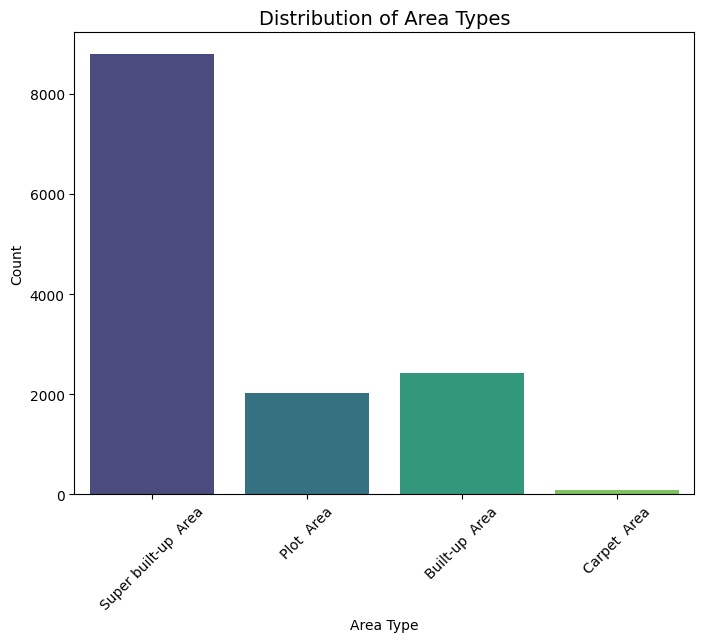

In [115]:
# Plot to explore Distribution of area

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='area_type', palette='viridis')
plt.title('Distribution of Area Types', fontsize=14)
plt.xlabel('Area Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

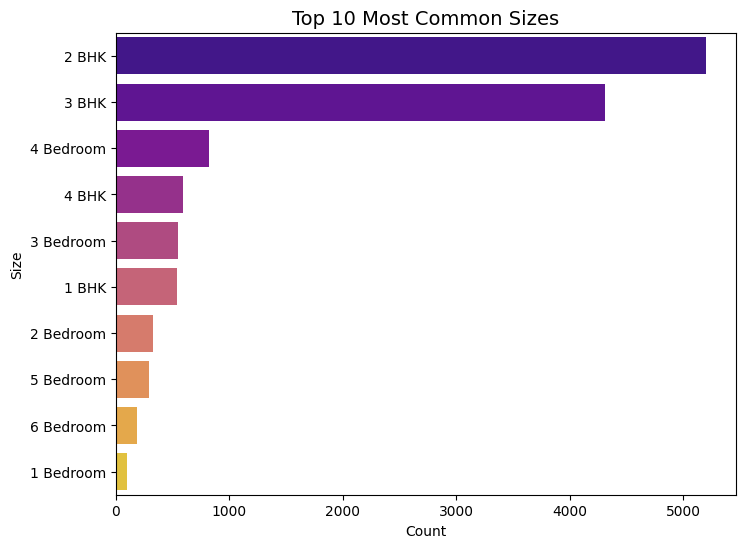

In [116]:
# Plot to analyze Most common sizes

plt.figure(figsize=(8, 6))
sns.countplot(data=df, y='size', order=df['size'].value_counts().index[:10], palette='plasma')
plt.title('Top 10 Most Common Sizes', fontsize=14)
plt.xlabel('Count')
plt.ylabel('Size')
plt.show()

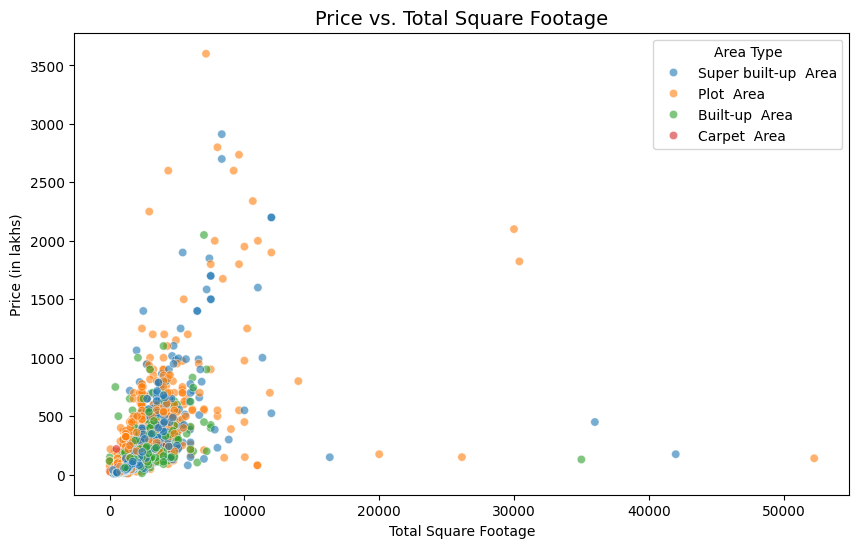

In [117]:
# Plot to visualize Relationship between sqft and price

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x=pd.to_numeric(df['total_sqft'], errors='coerce'), y='price', hue='area_type', palette='tab10', alpha=0.6)
plt.title('Price vs. Total Square Footage', fontsize=14)
plt.xlabel('Total Square Footage')
plt.ylabel('Price (in lakhs)')
plt.legend(title='Area Type')
plt.show()

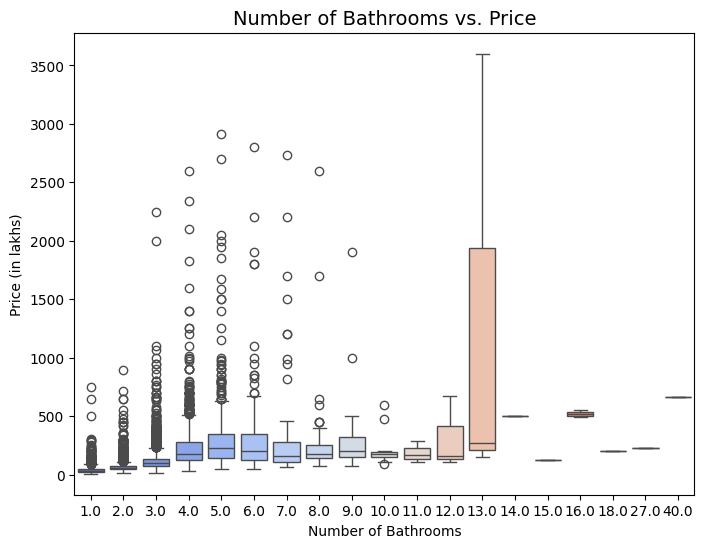

In [118]:
# Plot to compare Impact of bath on price

plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='bath', y='price', palette='coolwarm')
plt.title('Number of Bathrooms vs. Price', fontsize=14)
plt.xlabel('Number of Bathrooms')
plt.ylabel('Price (in lakhs)')
plt.show()

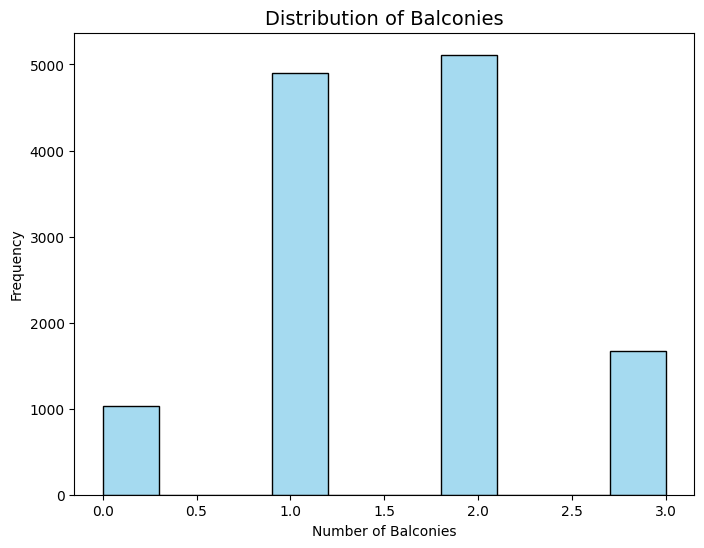

In [119]:
# Plot to visualize Distribution of balcony

plt.figure(figsize=(8, 6))
sns.histplot(df['balcony'].dropna(), bins=10, kde=False, color='skyblue')
plt.title('Distribution of Balconies', fontsize=14)
plt.xlabel('Number of Balconies')
plt.ylabel('Frequency')
plt.show()

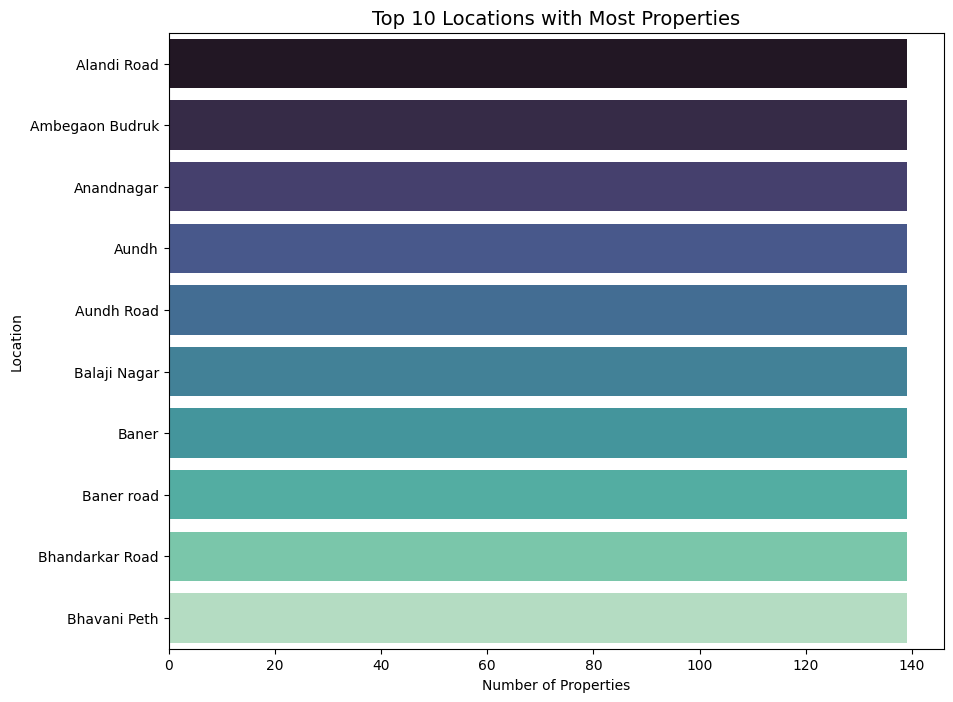

In [120]:
# Plot to explore Frequency of Properties by site location

plt.figure(figsize=(10, 8))
top_locations = df['site_location'].value_counts().head(10)
sns.barplot(y=top_locations.index, x=top_locations.values, palette='mako')
plt.title('Top 10 Locations with Most Properties', fontsize=14)
plt.xlabel('Number of Properties')
plt.ylabel('Location')
plt.show()

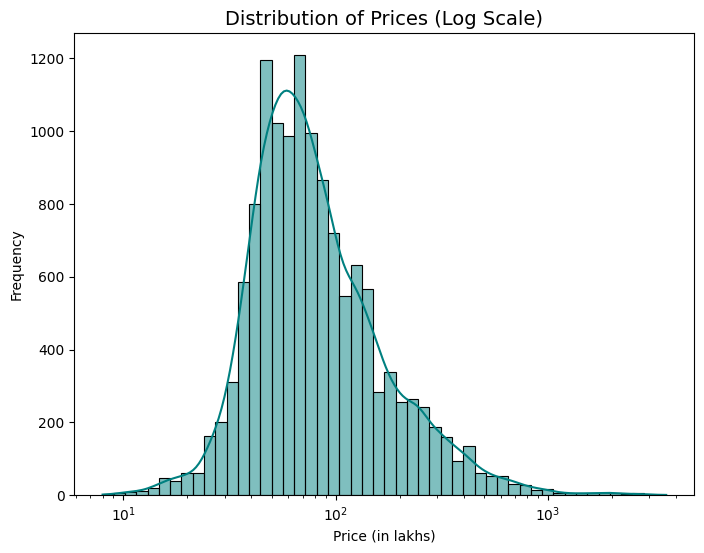

In [121]:
# Plot to visualize Distribution of price

plt.figure(figsize=(8, 6))
sns.histplot(df['price'], bins=50, kde=True, color='teal', log_scale=True)
plt.title('Distribution of Prices (Log Scale)', fontsize=14)
plt.xlabel('Price (in lakhs)')
plt.ylabel('Frequency')
plt.show()

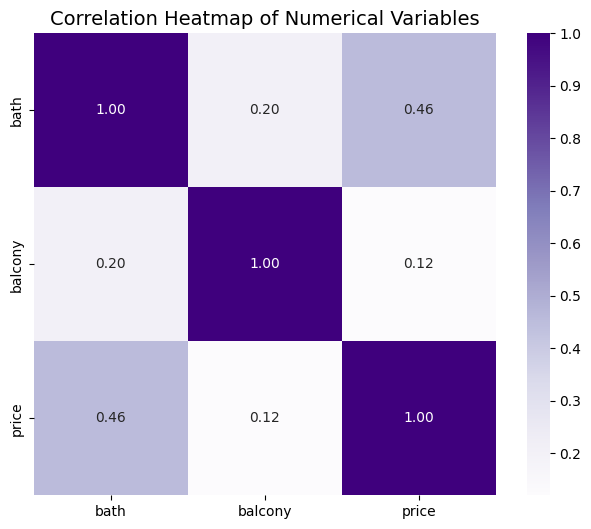

In [122]:
# Heatmaps to visualize correlations among numerical features

numerical_cols = ['bath', 'balcony', 'price']
corr_matrix = df[numerical_cols].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='Purples', fmt='.2f', square=True)
plt.title('Correlation Heatmap of Numerical Variables', fontsize=14)
plt.show()

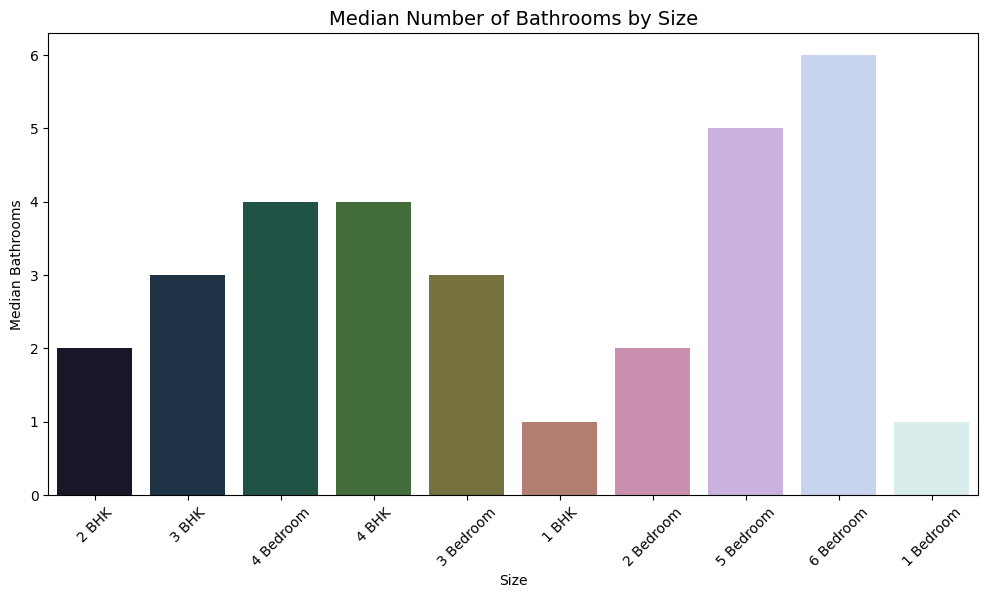

In [123]:
# plot to compare size and bath

plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='size', y='bath', estimator='median', ci=None, order=df['size'].value_counts().index[:10], palette='cubehelix')
plt.title('Median Number of Bathrooms by Size', fontsize=14)
plt.xlabel('Size')
plt.ylabel('Median Bathrooms')
plt.xticks(rotation=45)
plt.show()

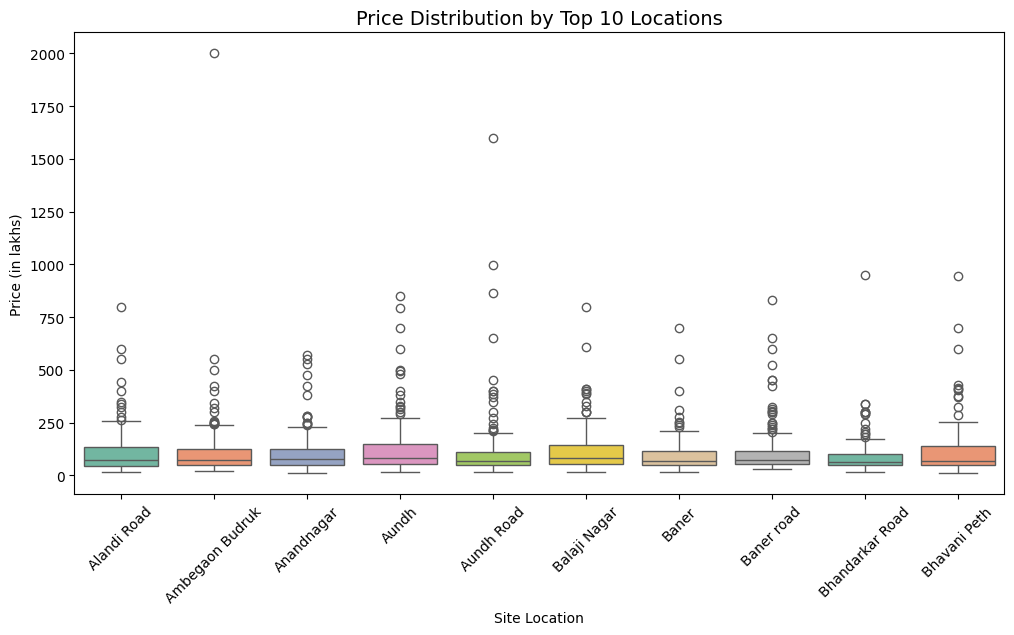

In [124]:
# Plot to compare site location vs price

top_locations = df['site_location'].value_counts().head(10).index
plt.figure(figsize=(12, 6))
sns.boxplot(data=df[df['site_location'].isin(top_locations)], x='site_location', y='price', palette='Set2')
plt.title('Price Distribution by Top 10 Locations', fontsize=14)
plt.xlabel('Site Location')
plt.ylabel('Price (in lakhs)')
plt.xticks(rotation=45)
plt.show()

## Data Preprocessing

In [125]:
# Dropping unwanted column

df = df.drop('society', axis='columns')
df.head()

,area_type,availability,size,total_sqft,bath,balcony,price,site_location
0,Super built-up Area,19-Dec,2 BHK,1056,2.0,1.0,39.07,Alandi Road
1,Plot Area,Ready To Move,4 Bedroom,2600,5.0,3.0,120.00,Ambegaon Budruk
2,Built-up Area,Ready To Move,3 BHK,1440,2.0,3.0,62.00,Anandnagar
3,Super built-up Area,Ready To Move,3 BHK,1521,3.0,1.0,95.00,Aundh
4,Super built-up Area,Ready To Move,2 BHK,1200,2.0,1.0,51.00,Aundh Road


In [126]:
# Filling missing values

df['balcony'].fillna(df['balcony'].median(), inplace=True)
df['bath'].fillna(df['bath'].mode()[0], inplace=True)
df['size'].fillna(df['size'].mode()[0], inplace=True)

df = df.dropna(subset=['site_location'])

In [127]:
df.isnull().sum()

area_type        0
availability     0
size             0
total_sqft       0
bath             0
balcony          0
price            0
site_location    0
dtype: int64

In [128]:
## Addressing the problematic entries in the dataset

def isFloat(x):
    try:
        float(x)
    except:
        return False
    return True

df[~df['total_sqft'].apply(isFloat)] # Displaying all the rows that are not integers

,area_type,availability,size,total_sqft,bath,balcony,price,site_location
30,Super built-up Area,19-Dec,4 BHK,2100 - 2850,4.0,0.0,186.000,Gultekdi
56,Built-up Area,20-Feb,4 Bedroom,3010 - 3410,2.0,2.0,192.000,Model colony
81,Built-up Area,18-Oct,4 Bedroom,2957 - 3450,2.0,2.0,224.500,Shukrawar Peth
122,Super built-up Area,18-Mar,4 BHK,3067 - 8156,4.0,0.0,477.000,Ganeshkhind
137,Super built-up Area,19-Mar,2 BHK,1042 - 1105,2.0,0.0,54.005,Khadaki
...,...,...,...,...,...,...,...,...
12990,Super built-up Area,18-May,3 BHK,1804 - 2273,3.0,0.0,122.000,Gokhale Nagar
13059,Super built-up Area,Ready To Move,2 BHK,1200 - 1470,2.0,0.0,72.760,Anandnagar
13240,Super built-up Area,Ready To Move,1 BHK,1020 - 1130,2.0,2.0,52.570,Vadgaon Budruk
13265,Super built-up Area,20-Sep,2 BHK,1133 - 1384,2.0,0.0,59.135,Dapodi


In [129]:
# Converting 'total_sqft' values to numeric format and creates a new column new_total_sqft

def convert_sqft_to_num(x):
    tokens = x.split('-')
    if len(tokens) == 2:
        return (float(tokens[0])+float(tokens[1]))/2
    try:
        return float(x)
    except:
        return None

df['new_total_sqft'] = df.total_sqft.apply(convert_sqft_to_num)
df = df.drop('total_sqft', axis='columns')
df.head()

,area_type,availability,size,bath,balcony,price,site_location,new_total_sqft
0,Super built-up Area,19-Dec,2 BHK,2.0,1.0,39.07,Alandi Road,1056.0
1,Plot Area,Ready To Move,4 Bedroom,5.0,3.0,120.00,Ambegaon Budruk,2600.0
2,Built-up Area,Ready To Move,3 BHK,2.0,3.0,62.00,Anandnagar,1440.0
3,Super built-up Area,Ready To Move,3 BHK,3.0,1.0,95.00,Aundh,1521.0
4,Super built-up Area,Ready To Move,2 BHK,2.0,1.0,51.00,Aundh Road,1200.0


In [130]:
# Calculating the price per square foot by converting the price from Lakhs to rupees and dividing by the total square footage

df['price_per_sqft'] = (df['price']*100000)/df['new_total_sqft']
df.head()

,area_type,availability,size,bath,balcony,price,site_location,new_total_sqft,price_per_sqft
0,Super built-up Area,19-Dec,2 BHK,2.0,1.0,39.07,Alandi Road,1056.0,3699.810606
1,Plot Area,Ready To Move,4 Bedroom,5.0,3.0,120.00,Ambegaon Budruk,2600.0,4615.384615
2,Built-up Area,Ready To Move,3 BHK,2.0,3.0,62.00,Anandnagar,1440.0,4305.555556
3,Super built-up Area,Ready To Move,3 BHK,3.0,1.0,95.00,Aundh,1521.0,6245.890861
4,Super built-up Area,Ready To Move,2 BHK,2.0,1.0,51.00,Aundh Road,1200.0,4250.000000


In [131]:
# Removes leading and trailing whitespace from the 'site_location' column values

df.site_location = df.site_location.apply(lambda x: x.strip())

In [132]:
# Calulating all the unqiue values in 'site_location' column

location_stats = df.groupby('site_location')['site_location'].agg('count').sort_values(ascending=False)
print(len(location_stats[location_stats<=10]), len(df.site_location.unique()))

1 97


In [133]:
# Labelling the locations with less than or equal to 10 occurences to 'other'

locations_less_than_10 = location_stats[location_stats<=10]

df.site_location = df.site_location.apply(lambda x: 'other' if x in locations_less_than_10 else x)
len(df.site_location.unique())

97

In [134]:
# Counts 'availability' categories, labels rare ones, and returns unique count

df.groupby('availability')['availability'].agg('count').sort_values(ascending=False)
dates = df.groupby('availability')['availability'].agg('count').sort_values(ascending=False)
dates_not_ready = dates[dates<10000]
df.availability = df.availability.apply(lambda x: 'Not Ready' if x in dates_not_ready else x)
len(df.availability.unique())

2

In [135]:
df.isnull().sum()

area_type          0
availability       0
size               0
bath               0
balcony            0
price              0
site_location      0
new_total_sqft    46
price_per_sqft    46
dtype: int64

In [136]:
# Fill missing values with the median for both columns

df['new_total_sqft'].fillna(df['new_total_sqft'].median(), inplace=True)
df['price_per_sqft'].fillna(df['price_per_sqft'].median(), inplace=True)


In [137]:
# One Hot Encoding to convert categorical column to numerical column

df = pd.get_dummies(df, drop_first=True)

In [138]:
df.head(10)

,bath,balcony,price,new_total_sqft,price_per_sqft,area_type_Carpet Area,area_type_Plot Area,area_type_Super built-up Area,availability_Ready To Move,size_1 Bedroom,...,site_location_Vadgaon Budruk,site_location_Viman Nagar,site_location_Vishrant Wadi,site_location_Wadgaon Sheri,site_location_Wagholi,site_location_Wakadewadi,site_location_Wanowrie,site_location_Warje,site_location_Yerawada,site_location_other
0,2.0,1.0,39.07,1056.0,3699.810606,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,5.0,3.0,120.00,2600.0,4615.384615,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False
2,2.0,3.0,62.00,1440.0,4305.555556,False,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
3,3.0,1.0,95.00,1521.0,6245.890861,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
4,2.0,1.0,51.00,1200.0,4250.000000,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
5,2.0,1.0,38.00,1170.0,3247.863248,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
6,4.0,2.0,204.00,2732.0,7467.057101,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
7,4.0,2.0,600.00,3300.0,18181.818182,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
8,3.0,1.0,63.25,1310.0,4828.244275,False,False,True,True,False,...,False,False,False,False,False,False,False,False,False,False
9,6.0,2.0,370.00,1020.0,36274.509804,False,True,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [139]:
## Scaling our data and removing outlier

from scipy.stats import zscore

numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df = df[numerical_columns].apply(zscore)
df = df[(np.abs(df) < 3).all(axis=1)]

print(f"Original number of rows: {df.shape[0]}")
print(f"Rows after outlier removal: {df.shape[0]}")

Original number of rows: 12857
Rows after outlier removal: 12857


In [140]:
# Train Test And Split

from sklearn.model_selection import train_test_split

In [141]:
X = df.drop(['price'], axis=1)  # Drop the target column 'price'
y = df['price']  # Target column 'price'

In [142]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Model Training

In [143]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,BaggingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score,mean_squared_error

In [144]:
Linear_reg = LinearRegression(),
Ride_reg= Ridge()
XGBoost = XGBRegressor()
Random_forest = RandomForestRegressor()
Ada_boost = AdaBoostRegressor()
Grad_boost = GradientBoostingRegressor()
Bagging= BaggingRegressor()

In [145]:
model_li = [Ride_reg,XGBoost,Random_forest,Ada_boost,Grad_boost,Bagging]

In [146]:
Score =[]
for model in model_li:
    model.fit(X_train,y_train)
    Score.append(r2_score(y_test,model.predict(X_test)))

In [147]:
Score

[0.866902694139744,
 0.9863978273921399,
 0.9889625058743784,
 0.8488448500097572,
 0.9740369760450779,
 0.9911994409934659]

## Model Evaluation

<p style="font-size: 20px;"> Random Forest Regressor gives the best result </p>

In [148]:
# R2 score for the Random Forest model

Random_forest.fit(X_train,y_train)
print("The R2 score of Random Forest : ",r2_score(y_test,Random_forest.predict(X_test)))

The R2 score of Random Forest :  0.9895371482109696


In [149]:
# Mean Squared Error (MSE) for the Random Forest model

y_pred = Random_forest.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error (MSE) for Random Forest: ", mse)

Mean Squared Error (MSE) for Random Forest:  0.003052985532583592


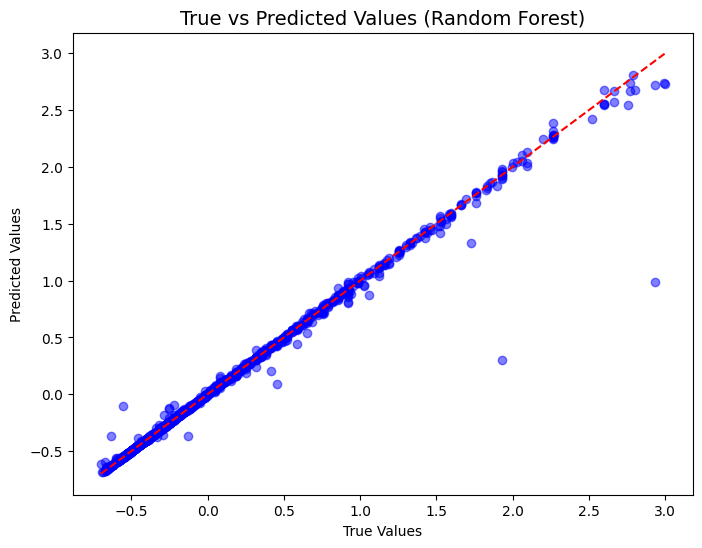

In [150]:
# Plotting True vs Predicted values

y_pred = Random_forest.predict(X_test)

plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')  # Diagonal line
plt.title('True vs Predicted Values (Random Forest)', fontsize=14)
plt.xlabel('True Values')
plt.ylabel('Predicted Values')
plt.show()

## Conclusion

In this notebook, we successfully built a model to predict real estate prices in Pune using factors such as total square footage, area type, number of bathrooms, and balcony availability. After comprehensive data preprocessing and model training, the model achieved an impressive **R² score of approximately 99%**, demonstrating that it explains nearly all the variance in the dataset.

This high performance highlights the model's effectiveness in predicting property prices, providing valuable insights for buyers, sellers, and investors in Pune's real estate market. These predictions can support informed decision-making and strategic planning in the industry. Future enhancements could include integrating external market factors or experimenting with more complex algorithms to refine the predictions further.

<p style="font-size: 20px;"> If you liked this notebook, please consider giving an upvote and leaving feedback — it would mean a lot! Let's keep learning and growing! 🌟 </p>